Calculate intercept

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Implementation of batch gradient descent

In [100]:
import numpy as np
class BGDRegressor:
    def __init__(self):
        self._coef = None
        self._intercept = None
        self.loss_history = []  # Store loss at each iteration
        self._coefmatrix= None
    
    def fit(self,X,y,learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        y =y.reshape(-1, 1)
        m, n = X.shape  # Get dimensions
        X_b = np.c_[np.ones((m,1)), X]
        theta = np.random.randn(n + 1, 1)   # Small random values
        for iteration in range(n_iterations):
            predictions = X_b.dot(theta)  
            loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # MSE loss
            self.loss_history.append(loss)  # Store loss

            gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y) # Compute gradients
            new_theta = theta - learning_rate * gradients  # Update parameters

            # Check convergence
            if np.linalg.norm(new_theta - theta) < tolerance:
                print(f"Converged in {iteration} iterations")
                break

            theta = new_theta  # Update theta for next iteration
        self._coef = theta[1:].flatten().tolist()
        print(theta.shape)
        self._intercept = theta[0]
        self._coefmatrix = theta
        return self._coef, self._intercept
    
    def plot_loss(self):
        print(self.loss_history)
        plt.plot(range(len(self.loss_history)), self.loss_history, label="Loss Curve")
        plt.xlabel("Iterations")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss vs. Iterations")
        plt.legend()
        plt.show()

    def predict(self, x_test):
        m = x_test.shape[0]  # Number of test samples
        x_test_b = np.c_[np.ones((m, 1)), x_test]  # Add bias term (column of ones)
        return x_test_b.dot(self._coefmatrix)  # Compute predictions

Results : On synthetic data

In [101]:
X,y = make_regression(n_samples=500, n_features=10, n_informative=1,n_targets=1,noise=100)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
bgd_custom = BGDRegressor()

[8512.413263272649, 8446.8586283993, 8382.678753343462, 8319.844128165712, 8258.325889261, 8198.095804958264, 8139.126261445535, 8081.390249013061, 8024.86134860721, 7969.513718688012, 7915.322082383437, 7862.261714933589, 7810.308431418229, 7759.438574761114, 7709.629004004882, 7660.857082850254, 7613.100668453558, 7566.338100476654, 7520.548190383527, 7475.7102109779, 7431.803886176376, 7388.809381011748, 7346.707291861229, 7305.478636894463, 7265.104846736333, 7225.5677553396445, 7186.849591062944, 7148.932967948761, 7111.800877197754, 7075.436678834262, 7039.824093558937, 7004.9471947842, 6970.790400848345, 6937.338467404251, 6904.576479978736, 6872.489846698637, 6841.064291179899, 6810.285845575901, 6780.140843781454, 6750.615914788912, 6721.697976192949, 6693.374227840644, 6665.632145623569, 6638.459475408644, 6611.844227104644, 6585.77466886128, 6560.239321397813, 6535.226952458325, 6510.726571390741, 6486.727423846802, 6463.218986600275, 6440.1909624807, 6417.6332754200885, 639

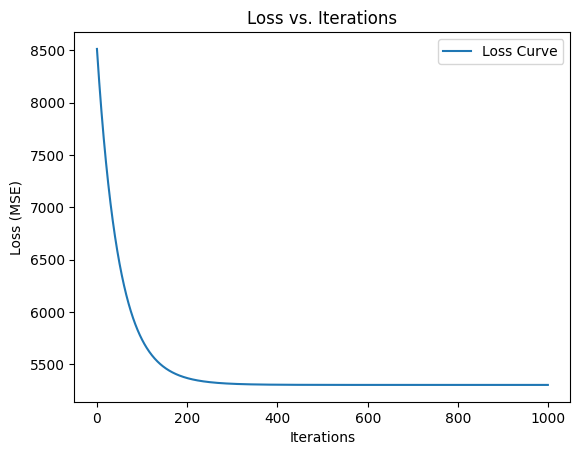

In [120]:
bgd_custom.plot_loss()

In [105]:
# Results of custom regression model
bgd_custom.fit(X_train, y_train)
print(bgd_custom._coef)
coef_custom = bgd_custom._coef
print(bgd_custom._intercept)

(11, 1)
[81.51870482061197, -0.9406346090551988, 0.3388108357470087, 4.364189269407511, 1.8479376065267141, 0.3732410809264459, -4.6552998168337085, 0.8186935814057865, 2.662731492276111, 5.407630113846699]
[3.92087359]


In [106]:
# Result of the sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
coef = lr.coef_
print(list(lr.coef_))
print(lr.intercept_)
print(type(coef[0]))

[81.52973682525426, -0.945524653939362, 0.3478385920587563, 4.36278381493244, 1.8508273611221173, 0.370561032442869, -4.654231115380549, 0.8141575559996547, 2.6636608038976433, 5.417217200960913]
3.9244427613925565
<class 'numpy.float64'>


In [107]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d_predictions(X_test, y_test, y_pred):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')  # Actual points
    ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted')  # Predictions

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Target")
    plt.title("Actual vs. Predicted")
    plt.legend()
    plt.show()

In [108]:
bgd_custom.predict(X_test)

array([[-4.92117624e+01],
       [-2.91190124e+01],
       [ 5.84872507e+01],
       [ 1.65652609e+01],
       [-5.02342008e+01],
       [ 1.14624724e+02],
       [-5.51890547e+01],
       [ 9.60002359e+01],
       [ 1.50201750e+02],
       [-6.11277318e+01],
       [-8.17933476e+01],
       [ 2.55578881e+01],
       [-8.42102362e+00],
       [-2.28868428e+01],
       [ 2.13670448e+01],
       [-7.28578604e+01],
       [-5.88746964e+01],
       [ 3.66421879e+01],
       [ 6.66589522e+01],
       [ 1.34661978e+02],
       [ 2.50537848e+02],
       [ 2.02496869e+01],
       [ 3.54809229e+01],
       [ 9.15839781e+01],
       [ 8.82111694e-01],
       [ 4.35094298e+01],
       [-4.26219118e+01],
       [ 6.39266214e+01],
       [ 7.38984471e+01],
       [-1.45996037e+02],
       [ 1.03963595e+02],
       [ 7.42001099e+01],
       [ 9.90603997e+01],
       [-1.14041569e+02],
       [ 5.98176964e+01],
       [ 7.32826563e+00],
       [-1.15136451e+02],
       [-6.54974365e+01],
       [ 5.8

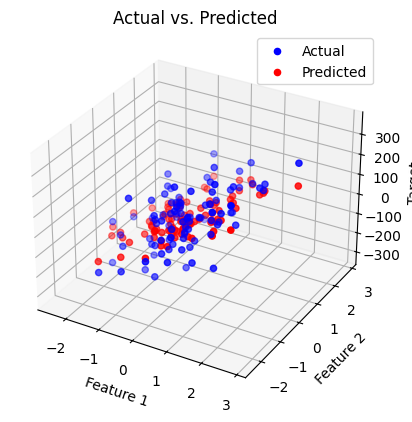

In [109]:
plot_3d_predictions(X_test, y_test, bgd_custom.predict(X_test))

In [110]:
from sklearn.metrics import mean_squared_error
mse_custom = mean_squared_error(y_test, bgd_custom.predict(X_test))
mse_sklearn = mean_squared_error(y_test,lr.predict(X_test))
print("Cusotm MSE is",mse_custom)
print("MSE by sklearn is",mse_sklearn)

Cusotm MSE is 8831.360550270161
MSE by sklearn is 8830.855126975233


In [111]:
# X,y = make_regression(n_samples=500, n_features=10, n_informative=1,n_targets=1,noise=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Results of custom regression model
bgd_custom = BGDRegressor()
bgd_custom.fit(X_train, y_train)
print(bgd_custom._coef)
coef_custom = bgd_custom._coef
print(bgd_custom._intercept)


(11, 1)
[81.5188486613905, -0.9405817718705183, 0.33889107208866265, 4.3640188421599575, 1.848120810055607, 0.3731733101299552, -4.655265059786084, 0.8186054434495087, 2.662894896975094, 5.40797005063324]
[3.92074943]


In [113]:
# Result of the sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
coef = lr.coef_
print(list(lr.coef_))
print(lr.intercept_)
print(type(coef[0]))

[81.52973682525426, -0.945524653939362, 0.3478385920587563, 4.36278381493244, 1.8508273611221173, 0.370561032442869, -4.654231115380549, 0.8141575559996547, 2.6636608038976433, 5.417217200960913]
3.9244427613925565
<class 'numpy.float64'>


In [114]:
from sklearn.metrics import mean_squared_error
mse_custom = mean_squared_error(y_test, bgd_custom.predict(X_test))
mse_sklearn = mean_squared_error(y_test,lr.predict(X_test))
print("Cusotm MSE is",mse_custom)
print("MSE by sklearn is",mse_sklearn)

Cusotm MSE is 8831.342862041562
MSE by sklearn is 8830.855126975233


Results on dataset 1

In [115]:
# Load dataset
df = pd.read_csv('placement.csv')
# Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column as target
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
bgd = BGDRegressor()
bgd.fit(X_train, y_train)

(2, 1)


([0.29919609232350425], array([0.94538199]))

In [117]:
# Result of the sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
coef = lr.coef_
print(list(lr.coef_))
print(lr.intercept_)
print(type(coef[0]))

[0.5742564727019197]
-1.0270069374542108
<class 'numpy.float64'>
